# IoT-ABE gas analysis

In [1]:
!python3 -m pip install matplotlib
!python3 -m pip install pandas

In [1]:
%pylab inline

import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=14.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(18.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
gas_df = pd.read_csv("./data/gas.csv")

In [3]:
gas_df.head()

,operation,gas,tx,description
0,init,2440334,0x2044545a7259bc093389a83c94450fb33c50aee0edd1...,standard
1,init,2440334,0xb54b5ff4840452d8cc104d807b4881b4f0e4ae4c4392...,standard
2,request,43293,0x6e73c68323e261ffc64c7f015315992188646ed6bccf...,standard
3,grant,1648613,0x491ac23f1388e91d69779368cec3f6b1312f689110e4...,standard
4,policy,48606,0x4ae08442d61077db0489a04d18e68b42fdfd99a142b7...,standard


In [4]:
gas_df_groups = gas_df.groupby('operation')
gas_df_grouped = gas_df_groups.mean()
gas_df_grouped["std"] = gas_df_groups.std()


Text(0.5, 1.0, 'Gas per operation')

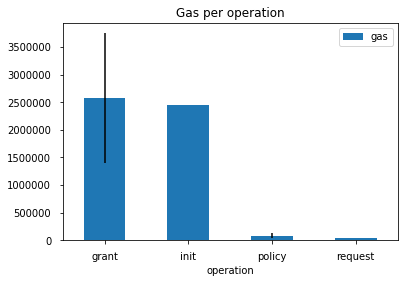

In [5]:
ax = gas_df_grouped.plot.bar(y='gas', yerr="std", rot=0)
ax.set_title("Gas per operation")

In [6]:
gasPrice = 2 * 1e9 #2 GWei
exchangeRate = 243 #1 ETH = 243 CHF

gas_df['txFee'] = gas_df.apply(lambda row: row["gas"]*gasPrice, axis=1)
gas_df['txFeeETH'] = gas_df.apply(lambda row: row['txFee'] / 1e18, axis=1)
gas_df['txFeeCHF'] = gas_df.apply(lambda row: row['txFeeETH'] * exchangeRate, axis=1)

In [7]:
gas_df

,operation,gas,tx,description,txFee,txFeeETH,txFeeCHF
0,init,2440334,0x2044545a7259bc093389a83c94450fb33c50aee0edd1...,standard,4.880668e+15,0.004881,1.186002
1,init,2440334,0xb54b5ff4840452d8cc104d807b4881b4f0e4ae4c4392...,standard,4.880668e+15,0.004881,1.186002
2,request,43293,0x6e73c68323e261ffc64c7f015315992188646ed6bccf...,standard,8.658600e+13,0.000087,0.021040
3,grant,1648613,0x491ac23f1388e91d69779368cec3f6b1312f689110e4...,standard,3.297226e+15,0.003297,0.801226
4,policy,48606,0x4ae08442d61077db0489a04d18e68b42fdfd99a142b7...,standard,9.721200e+13,0.000097,0.023623
5,policy,75207,0x97f22799a54d7341a9c7d69549bbc1f1a701040a6879...,standard,1.504140e+14,0.000150,0.036551
6,policy,90207,0x236f2a266ed3fb4f31c52c2d9dab44dffd053ba30735...,standard,1.804140e+14,0.000180,0.043841
7,policy,21668,0x236f2a266ed3fb4f31c52c2d9dab44dffd053ba30735...,standard,4.333600e+13,0.000043,0.010531
8,init,2440334,0x4bd5b787ef3b2562c69d8c6aa9b091644d8b12de6bb0...,3 attrs,4.880668e+15,0.004881,1.186002
9,request,43293,0x559f63c2f4576958651ad4a8b134414cd1af46073387...,3 attrs,8.658600e+13,0.000087,0.021040


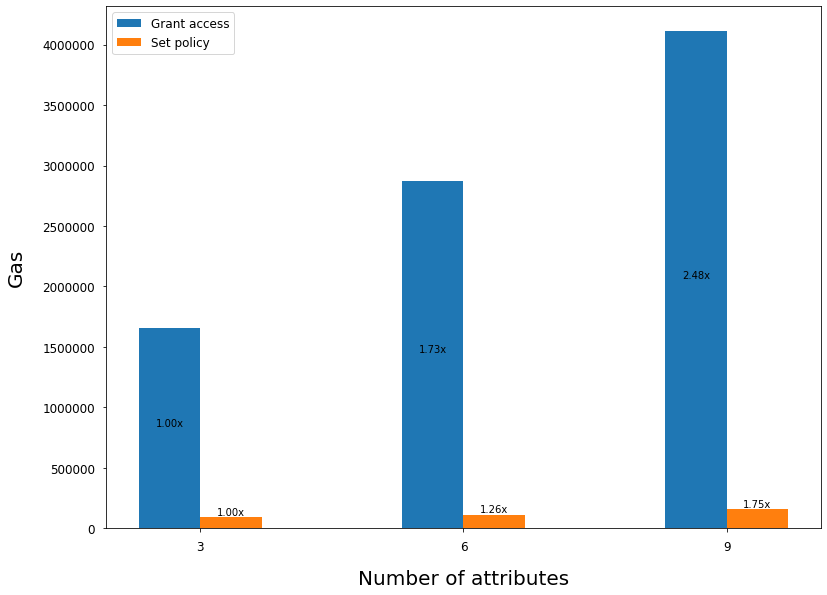

In [16]:
x = np.array([3, 6 ,9]) #number of attributes
y_grant = [1656777, 2873500, 4110745] #gas grant
y_policy = [90399, 113817, 157773] #gas policy

fig, ax = plt.subplots(figsize=[12.8, 9.6])

width = 0.7       # the width of the bars
p1 = ax.bar(x-width/2, y_grant, width)
p2 = ax.bar(x+width/2, y_policy, width)

#ax.set_title('Gas cost per number of attributes')
ax.legend((p1[0], p2[0]), ('Grant access', 'Set policy'), prop={'size': 12})

ax.autoscale_view()
ax.set_ylabel("Gas", fontsize=20, labelpad=16)
ax.set_xlabel("Number of attributes", fontsize=20, labelpad=16)

ax.set_xticks(x)
ax.set_xticklabels(('3', '6', '9'))
ax.tick_params(axis='both', labelsize=12)


for i, rect in enumerate(p1):
    height = rect.get_height()
    fact = 1
    if i > 0:
        fact = rect.get_height() / p1[0].get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height/2,'%.2fx' % fact,ha='center', va='bottom')

for i, rect in enumerate(p2):
    height = rect.get_height()
    fact = 1
    if i > 0:
        fact = rect.get_height() / p2[0].get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height+0.05,'%.2fx' % fact,ha='center', va='bottom')
                
plt.show()